### ```Exercise 1```

In [46]:
import matplotlib.pyplot as plt, numpy as np

#pip install dcor
import dcor

**1a). Download the data and perform quadratic regression with Distance as response variable and Angle as explanatory
variable, with both Python routines and matrix computation.**

In [9]:
# Read the file and get the Angle and Distance

filename =r"I:\.shortcut-targets-by-id\18_Ba5hQNuJ-AInD_13oyx0yiaN0cToVW\STAT4ACSAI\Juwara_Barda_Danese_HW_03\MLB.txt"

def readFile(filename, mode='r'):
    
    with open(filename, mode) as f:
        readIt = f.read().split()
        #print(readIt)
        
        l = len(readIt)
        l2 = (l//2) - 1 # print out the readIt to understand this
        
        X_matrix = np.empty((l2, 3), dtype='int')
        y = np.empty(shape=(l2,1))
        
        X_vec = [] # I'll use this later, just forget it for now.
        
        k=0
        for i in range(2, l, 2):
            y[k]  = np.array(  readIt[i+1], dtype='float') 
            
            X_matrix[k, :] = 1, int(readIt[i] ), (int(readIt[i]))**2        # c + bx + ax**2
            
            X_vec.append( int( readIt[i]) )
            
            k += 1
    
    return X_matrix, y, np.array(X_vec)

X_matrix, y, X_vec = readFile(filename)
print(X_matrix,y, X_vec, sep="\n\n")

[[   1   10  100]
 [   1   15  225]
 [   1   20  400]
 [   1   24  576]
 [   1   30  900]
 [   1   34 1156]
 [   1   40 1600]
 [   1   45 2025]
 [   1   48 2304]
 [   1   50 2500]
 [   1   58 3364]
 [   1   60 3600]
 [   1   64 4096]]

[[115.6]
 [157.2]
 [189.2]
 [220.8]
 [253.8]
 [269.2]
 [284.8]
 [285. ]
 [277.4]
 [269.2]
 [244.2]
 [231.4]
 [180.4]]

[10 15 20 24 30 34 40 45 48 50 58 60 64]


### Finding the parameters $\beta$  

$$\boldsymbol{ 
y = \beta X + \epsilon  \\  
\implies \epsilon = y-\beta X
}
$$

How do we find $\boldsymbol{\beta}$?  
Well, we already have the data points. We just have to solve for the least squares estimates of the parameters in a polynomial regression model.

In matrix form, we have,
$$
\boldsymbol{ ||Y - Xβ||^2 = (Y-X\beta)^T(Y-X\beta) = (Y^T - \beta^T X^T)(Y-X\beta) = Y^T Y - Y^T X \beta - \beta^T X^T Y + \beta^T X^T X \beta }
$$
Finding the minimum can be achieved through setting the gradient of the loss to zero and solving for $\displaystyle {\boldsymbol {\beta }}$. 
This implies that, 
$$
\frac{\partial}{\partial \beta} (Y^T Y - Y^T X \beta - \beta^T X^T Y + \beta^T X^T X \beta ) = 0  \\
\implies -2X^TY + 2X^TX\beta = 0 \\
\implies X^TY = X^TX\beta\\
$$
If  $X^TY$ is not **singular**, then
$$ \boldsymbol{ \beta = (X^TX)^{-1} X^TY } $$




#### For Quadratic regression, we have: $y = \beta_0 + \beta_1 X + \beta_2 X^2$, where X is the Angle and y is the Distance.

Now let us find the parameters $\beta$ in pyhton

In [47]:
# Calculating the parameters beta

def beta_func(X, Y):

    inv = np.linalg.inv 
    param_betas = inv(X.T @ X) @ X.T @ Y
    
    return np.array([arr[0] for arr in param_betas])

beta = beta_func(X_matrix,y)
print(beta)


[-21.89774466  14.52117133  -0.17371411]


With these computed parameters for $\beta$, our Quadratic regression is $\boldsymbol{ y = -21.8977 + 14.5212X - 0.1737X^2 } $

In [49]:
# The predicted values by the model.

def quadratic_regression(X_vec, beta):
    
    return beta[0] + beta[1]*X_vec + beta[2]*( X_vec**2 )
    #return  X_matrix @ beta.T if X_matrix is used instead

y_hat = quadratic_regression(X_vec, beta)
print(y_hat)


# But the beta_func and the quadratic_regression functions above could have been implemented with python built-in functions as follows:
"""
betas = np.polyfit(X_vec, y, deg=2)
yhat_vals = np.polyval(betas, X_vec)
yhat_vals
"""

[105.94255727 156.83414971 199.04003646 226.55103777 257.39469291
 271.00856512 281.00652661 279.78388493 274.8811612  269.87553757
 235.95591396 224.00172579 195.92421071]


'\nbetas = np.polyfit(X_vec, y, deg=2)\nyhat_vals = np.polyval(betas, X_vec)\nyhat_vals\n'

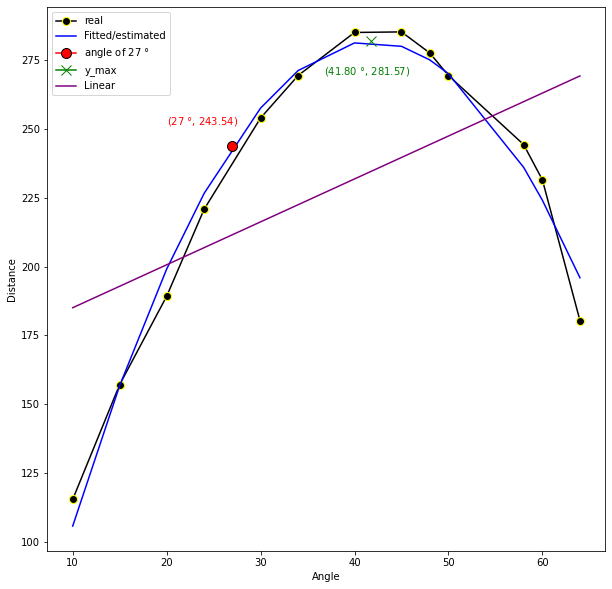

In [50]:
# Plot the points and visualize

plt.figure(figsize=(10, 10))
plt.plot(X_vec, y, marker='o', color='black', markersize=8, markeredgecolor='yellow', label='real')

plt.plot(X_vec, y_hat, color='blue', label='Fitted/estimated')

plt.xlabel("Angle")
plt.ylabel("Distance")

# Plot the angle value of 27
q = quadratic_regression(27, beta)
plt.plot(27, q, marker='o', color='red', markersize=10, markeredgecolor='black', label="angle of 27 $\degree$")

plt.annotate("(%d $\degree$, %.2f)" % (27,q), (20,q+8), color='r')

# Plot the y max
grad_x = (-beta[1])/(beta[2] *2)
y_max = quadratic_regression(grad_x, beta)
plt.plot(grad_x, y_max, marker='x', color='green', markersize=10, label='y_max')

plt.annotate("(%.2f $\degree$, %.2f)" % (grad_x, y_max), (grad_x-5,y_max-12), color='green')

# This concerns 3a) for linear regression instead of quadratic regression.
beta_linear = np.polyfit(X_vec, y, deg=1)
y_hat_linear = np.polyval(beta_linear, X_vec)
plt.plot(X_vec, y_hat_linear, color='purple', label='Linear')

plt.legend(loc='upper left')
plt.show()


**1b). Comment on the goodness of fit of the model.**

Well, we can use $R^2$ or $adjusted-R^2$.  

$$R^2 = \frac{SSR}{TSS} = \frac{ \sum_i (\widehat{Y} - \overline{Y})^2 }{\sum_i (Y - \overline{Y})^2} $$
where $\boldsymbol{ \widehat{Y} = X \beta} $
$$adjusted-R^2 = 1 - \frac{n-1}{n-(p+1)}(1-R^2) $$

From the computation below, $\boldsymbol{R}^2 = 0.98$ and $Adjusted-\boldsymbol{R}^2 = 0.977$. 
This means that 98% of the variability between the two variables has been accounted for (the “explained” part), and the remaining 2% of the variability is still unaccounted for

R² can be seen as the percentage of the prediction variable’s variation that is explained by a linear model.

In other words, it’s a measure of how close the data is to the fitted regression line:

In [51]:
def r_squared(y_hat, Y):
    
    # e = Y - y_hat
    # SSE = np.sum(e**2 )
    
    y_mean = np.mean(Y)
    
    TSS = np.sum( (Y- y_mean)**2 )
    SSR = np.sum( (y_hat - y_mean)**2 )
    
    return SSR/TSS

r_squared1 = r_squared(y_hat, y.T)

adjusted_r_squared = 1 - ( (len(y_hat)-1)/(len(y_hat)-len(beta)) )*(1-r_squared1)

r_squared1, adjusted_r_squared

#plt.scatter(X_vec, y)

(0.9812242873843355, 0.9774691448612026)

**2a).  What is the average distance we would observe with an angle of 27 $\boldsymbol{ \degree }$?**


From our quadratic regression, we got $\boldsymbol{ y = -21.8977 + 14.5212X - 0.1737X^2  } $ to 4 decimal places for precision. Substituting $\boldsymbol{27 \degree}$ for X gives the average distance thereof to be
$$
\boldsymbol{ y = -21.8977 + 14.5212X - 0.1737X^2 =  -21.8977 + 14.5212(27) - 0.1737(27)^2  \approx 243.54} 
$$
as can be seen from the graph.

**2b). What is the interpretation of $\boldsymbol{ \frac{−β_1}{ 2β_2} } $ ?**

For Quadratic regression, we have: $y = \beta_0 + \beta_1 X + \beta_2 X^2$. If we set the gradient to zero w.r.t X, we get
$$
\frac{\partial y}{\partial X} = \beta_1 + 2 \beta_2 X = 0  \\
\implies X = \frac{−β_1}{ 2β_2} 
$$
If we substitute for $\beta_1$ and $\beta_2 $, we get
$$
X = \frac{-14.5212}{ 2 (-0.1737)} \approx 41.8
$$

This is the value of X for which y has maximum value. In other words, it is the maxima. it is $\approx 281.57 $ as can be seen from the gragh above.

**3a).  Compute the correlation between Distance and Angle.**

We know that the correlation between 2 variables X,Y when they have linear relationship is well captured by $\boldsymbol{ r = \frac{Cov(X, Y)}{\sqrt{ Var(X)Var(Y) }} }$, where X is Angle in degrees and Y is Distance in feet  

What if the relationship is not linear? Well, we can still use r, but we prefer using Distance correlation defined as thus:
$$
dCorr(X, Y) = \frac{dCov(X, Y)}{\sqrt{dVar(X) dVar(Y)}}
$$
Where $dCov(X, Y) = \frac{1}{n^2} \sum_{i=1}^{n} \sum_{j=1}^{n} D(x_i, x_j) \cdot D(y_i, y_j) $.   
dVar(X) = dCov(X, X) and dVar(Y) = dCov(Y, Y). Lukily, we don't have to do the nitty-gritty work because python has a module for it called dcor.



From the computation below, the correlation between Angle and Distance is $\boldsymbol{dCorr} \approx 0.67$ when use Distance correlation, and $\boldsymbol{r} \approx 0.51$ when use pearson correlation coefficient.


In [54]:
#Even though the Quadratic regression almost perfectly fits the data as can be read from the R_Squared and seen from the graph, this below r function says that there is only 51% correlation between Angle and Distance, which means that r does not capture the relationship well because the relationship is non-linear.
#I use another correlation matrix called the Distance correlation as defined above, which works for non linear relationships as well.

# Pearson correlation coefficient, r
def r(X, Y):
    cor_vals = np.cov(X, Y.T)
    cor_XY = cor_vals[0,1]
    var_X = cor_vals[0,0]
    var_Y = cor_vals[1,1]

    return cor_XY/np.sqrt(var_X * var_Y)

r1 = r(X_vec, y)
print(r1 )

# Distance correlation, dCorr
import dcor
dcorr_XY = dcor.distance_correlation(X_vec, y)
print(dcorr_XY)


0.5125235098907193
0.6674225027061504


**3b).  Would simple linear regression be adequate for this problem?
Motivate your answer.**

From the graph above, we see that it does not fit the data, so the answer is no. But how do we quantify this?

Since the coefficient of determination (R²) is used to identify the strength of a model, we can use it to see how well the linear model captures our data.

From the code below, we can see that since R² = 0.26, which is well below 50%, we can conclude that the linear model does not model the data well, and so it is not adeguate.

In [55]:
r_squared_linear = r_squared(y_hat_linear, y.T)

adjusted_r_squared = 1 - ( (len(y_hat_linear)-1)/(len(y_hat_linear)-len(beta_linear)) )*(1-r_squared_linear)

r_squared_linear, adjusted_r_squared

#plt.scatter(X_vec, y)


(0.26268034819070213, 0.19565128893531136)